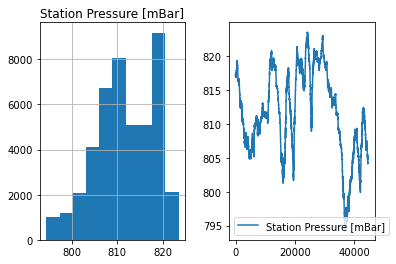

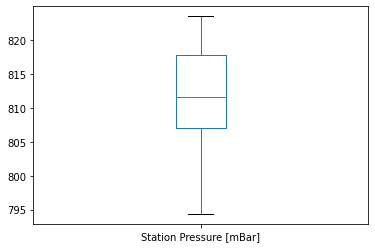

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Data is not normal


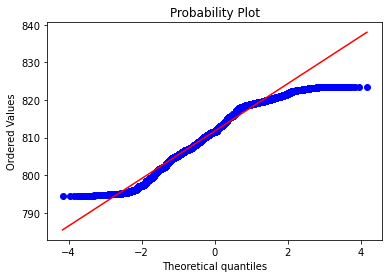

<Figure size 432x288 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from preporcessing import TimeSeries
from typing import List
from scipy.stats import shapiro
from scipy.stats import probplot


def plot(ts_list: List[str]):
    '''
    Plots one or more time series. The time axis is adjusted to display the data according to their time indices.

    ARGS:
        - ts_list: a list of one or more time series files to be plotted. The files will be of type str.

    SIDE EFFECTS:
        - produces a plot of one or more time series
    '''
    # Loop through every ts in the list
    for ts in ts_list:
        # Plot the ts data
        ts.data.plot()
        
        # Change the label of the x-axis and display the plot
        plt.xlabel("Date")
        plt.show()

def histogram(ts):
    '''
    Computes the histogram of a given time series and then plots it. When it's plotted, the histogram is vertical
    and side to side with a plot of the time series.

    ARGS:
        - ts: a single time series file to run operations on. Should be a string containing a csv filename.

    SIDE EFFECTS:
        - produces a histogram based on ts
    '''
    # Create a subplot with 1 row and 2 columns (for formatting)
    fig, axes = plt.subplots(1, 2)
    
    # Create the histogram and plot, then display them side-by-side
    ts.data.hist(ax=axes[0])
    ts.data.plot(ax=axes[1])

def box_plot(ts):
    '''
    Produces a Box and Whiskers plot of the given time series. Also prints the 5-number summary of the data.

    ARGS:
        - ts: a single time series file to run operations on. Should be a string containing a csv filename.

    SIDE EFFECTS:
        - prints the 5-number summary of the data; that is, it prints the minimum, maximum, first quartile, median,
        and third quartile
        - produces a Box and Whiskers plot of ts
    '''
    # Create and display the box plot
    ts.data.plot.box()
    plt.show()
    
    # Print the 5-number summary (plus a little extra)
    ts.data.describe()

def normality_test(ts):
    '''
    Performs a hypothesis test about normality on the given time series data distribution using Scipy's
    Shapiro-Wilkinson. Additionally, this function creates a quantile plot of the data using qqplot from matplotlib.

    ARGS:
        - ts: a single time series file to run operations on. Should be a string containing a csv filename.

    SIDE EFFECTS:
        - produces a quantile plot of the data from ts
    '''
    # Loop through each column in the dataframe
    for col in ts.data:
        # We want to run the shapiro test on the columns with numerical data
        if ts.data[col].dtype == 'float64':
            # Grab the column with the data we want
            results = ts.data[col]
       
    # Obtain the test statistics and the p-value using a Shapiro-Wilkinson test
    stats, p = shapiro(results)
    
    # Check to see if the data is normal or not
    if p > .05:
        print("Data is normal")
    else:
        print("Data is not normal")
    
    # Create and display the quantile plot
    probplot(results, plot=plt)
    plt.figure()

def mse(y_test, y_forecast):
    '''
    Computes the Mean Squared Error (MSE) error of two time series.

    ARGS:
        - y_test: the time series being tested
        - y_forecast: our forecasting model
    '''
    pass


def mape(y_test, y_forecast):
    '''
    Computes the Mean Absolute Percentage Error (MAPE) error of two time series.

    ARGS:
        - y_test: the time series being tested
        - y_forecast: our forecasting model
    '''
    pass


def smape(y_test, y_forecast):
    '''
    Computes the Symmetric Mean Absolute Percentage Error (SMAPE) error of two time series.

    ARGS:
        - y_test: the time series being tested
        - y_forecast: our forecasting model
    '''
    pass

ts = TimeSeries()
ts.read_from_file('Project Description/Time Series Data 2/AtmPres2005NovMin.csv')
#plot([ts])
histogram(ts)
box_plot(ts)
normality_test(ts)